In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reproducible_figures import *

from pathlib import Path

from jaxevocomm.utils.hydra_utils import load_config

def load_data(experiment_dir: Path):
    if not (experiment_dir / 'metrics.csv').exists():
        return None
    metrics = pd.read_csv(experiment_dir / 'metrics.csv')
    config = load_config(experiment_dir)
    for k, v in config.items():
        metrics[k] = v
    
    metrics['experiment_id'] = hash(experiment_dir)

    return metrics


def load_multirun_data(multirun_dir: Path):
    multirun_dir = Path(multirun_dir)
    return pd.concat([
        load_data(experiment_dir)
        for experiment_dir in multirun_dir.iterdir()
    ])

In [81]:
multirun_dir = Path('multirun/2024-04-03/16-21-27')
evo_data = load_multirun_data(multirun_dir)
evo_data = evo_data[(evo_data.iteration % 50 == 0) 
                    | (evo_data.iteration == evo_data.iteration.max())
                    | (evo_data.iteration == evo_data.iteration.min())]

evo_data['overlapping_sounds'] = evo_data['N_OVERLAPPING_SOUNDS'] == 1

all_evo_data = evo_data

experiment_best_performances = evo_data.groupby(['experiment_id'])[['max_reward']].max().reset_index()

sucessful_experiments = [
    row.experiment_id
    for row in experiment_best_performances.itertuples()
    if row.max_reward >= 10
]

evo_data = evo_data[evo_data.experiment_id.isin(sucessful_experiments)]

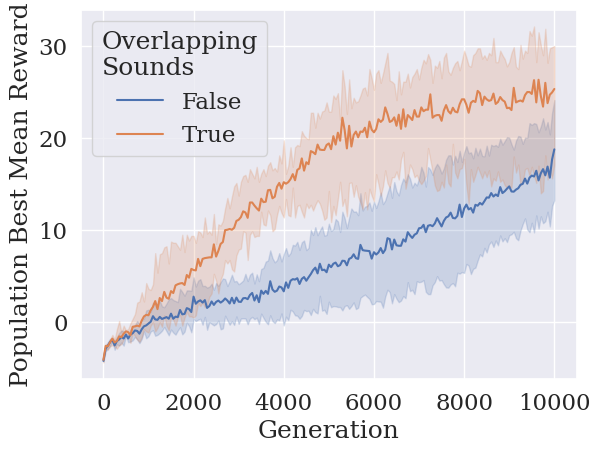

reformatted figures/evo_reward_curves/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [72]:
def plot(data):
    set_plotting_style()
    sns.lineplot(data=data,
                 x='iteration',
                 y='max_reward',
                 hue='overlapping_sounds',
                 errorbar='ci')
    plt.xlabel('Generation')
    plt.ylabel('Population Best Mean Reward')
    plt.legend(title='Overlapping\nSounds')


save_reproducible_figure(
    'evo_reward_curves', evo_data, plot, show=True
)

In [77]:
mappo_data = pd.concat([
    load_multirun_data('multirun/2024-04-04/11-51-41'),
    load_multirun_data('multirun/2024-04-04/10-59-39')
])
mappo_data = mappo_data[mappo_data.N_OVERLAPPING_SOUNDS.isin([0, 5])]
mappo_data['overlapping_sounds'] = mappo_data['N_OVERLAPPING_SOUNDS'] == 5

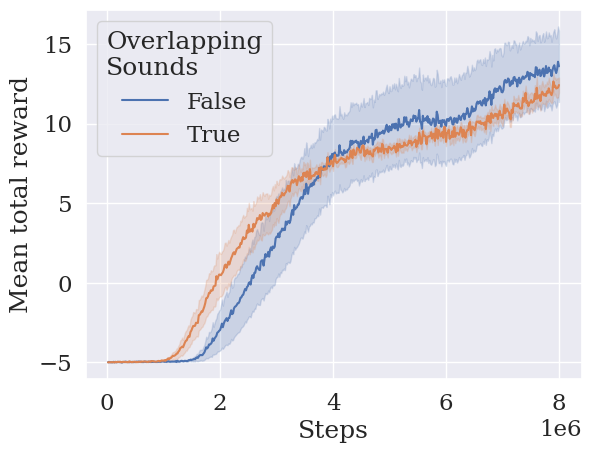

reformatted figures/mappo_reward_curves/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [80]:
def plot(data):
    set_plotting_style()
    sns.lineplot(data=data,
                 x='total_env_steps',
                 y='mean_total_reward',
                 hue='overlapping_sounds',
                 errorbar='se')
    plt.xlabel('Steps')
    plt.ylabel('Mean total reward')
    plt.legend(title='Overlapping\nSounds')


save_reproducible_figure(
    'mappo_reward_curves',
    mappo_data, plot, show=True
)

In [101]:
mappo_experiment_best_performances = (
    mappo_data[mappo_data.iteration == mappo_data.iteration.max()]
    .groupby(['overlapping_sounds'])[['mean_total_reward']]
    .describe()
    .reset_index()
)
# mappo_sucessful_experiments = [
#     row.experiment_id
#     for row in mappo_experiment_best_performances.itertuples()
#     if row.max_reward >= 10
# ]
mappo_experiment_best_performances

overlapping_sounds mean_total_reward                                 \
                                 count       mean       std       min   
0              False              10.0  13.601558  7.081292 -4.921876   
1               True              10.0  12.421871  1.509069  9.374996   

                                               
         25%        50%        75%        max  
0  15.234371  16.249996  16.845699  18.281242  
1  11.611324  12.402339  13.447261  14.453121

# Old MAPPO experiment

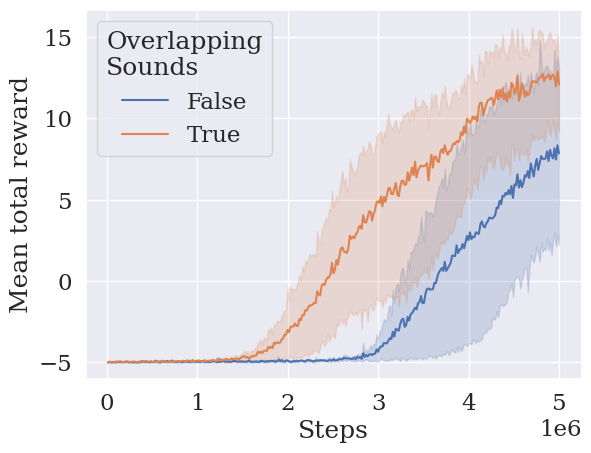

reformatted figures/overlapping_sounds_reward_curves/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [9]:
def plot(data):
    set_plotting_style()
    sns.lineplot(data=data,
                 x='total_env_steps',
                 y='mean_total_reward',
                 hue='overlapping_sounds')
    plt.xlabel('Steps')
    plt.ylabel('Mean total reward')
    plt.legend(title='Overlapping\nSounds')


multirun_dir = Path('multirun/2024-04-01/11-42-40')
mappo_data = load_multirun_data(multirun_dir)
mappo_data['overlapping_sounds'] = mappo_data['N_OVERLAPPING_SOUNDS'] == 5

save_reproducible_figure(
    'mappo_reward_curves',
    mappo_data, plot, show=True
)